<a href="https://colab.research.google.com/github/Shivp55/ComputerVision/blob/main/CV_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
pip install split-folders

In [7]:
#Import Libraries
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from keras import callbacks
from keras.callbacks import EarlyStopping
import splitfolders
import os

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# Source and destination folder paths
source_folder_path = "/content/drive/MyDrive/imagenette2"
destination_folder_path = "/content/drive/MyDrive/imagenette_data1"

# Copy the folder recursively
shutil.copytree(source_folder_path, destination_folder_path)


'/content/drive/MyDrive/imagenette_data1'

##Splitting the Data

In [11]:
# Define paths to validation and training folders
validation_folder = "/content/drive/MyDrive/imagenette_data1/val"
training_folder = "/content/drive/MyDrive/imagenette_data1/train"

# Iterate over class folders in the validation folder
for class_folder in os.listdir(validation_folder):
    class_folder_path = os.path.join(validation_folder, class_folder)
    if os.path.isdir(class_folder_path):
        # Check if the corresponding class folder exists in the training folder
        training_class_folder_path = os.path.join(training_folder, class_folder)
        if os.path.exists(training_class_folder_path):
            # Iterate over files in the class folder of the validation set
            for file_name in os.listdir(class_folder_path):
                file_path = os.path.join(class_folder_path, file_name)
                # Copy the file to the corresponding class folder in the training set
                shutil.copy(file_path, training_class_folder_path)
            print(f"Files from '{class_folder}' in the validation set copied to training set.")
        else:
            print(f"Corresponding class folder '{class_folder}' does not exist in the training set.")
    else:
        print(f"'{class_folder}' is not a folder.")

print("Copy process completed.")


Files from 'n03888257' in the validation set copied to training set.
Files from 'n03000684' in the validation set copied to training set.
Files from 'n03417042' in the validation set copied to training set.
Files from 'n03425413' in the validation set copied to training set.
Files from 'n03028079' in the validation set copied to training set.
Files from 'n03394916' in the validation set copied to training set.
Files from 'n03445777' in the validation set copied to training set.
Files from 'n02979186' in the validation set copied to training set.
Files from 'n02102040' in the validation set copied to training set.
Files from 'n01440764' in the validation set copied to training set.
Copy process completed.


In [12]:
# Define paths
data_folder = '/content/drive/MyDrive/imagenette_data1'  # Update this with the path to your data folder
output_folder = '/content/drive/MyDrive/Imagenette'

train_folder = os.path.join(data_folder, 'train')

#Count number of images in each class folder
class_image_count = {}
for class_folder in os.listdir(train_folder):
    class_path = os.path.join(train_folder, class_folder)
    if os.path.isdir(class_path):  # Check if it's a directory
        num_images = len(os.listdir(class_path))
        class_image_count[class_folder] = num_images

#Sort classes based on the number of images
sorted_classes = sorted(class_image_count.items(), key=lambda x: x[1])

#Delete the classes with the lowest number of images (4 classes)
num_classes_to_delete = 4
classes_to_delete = [class_name for class_name, _ in sorted_classes[:num_classes_to_delete]]

for class_name in classes_to_delete:
    class_path = os.path.join(train_folder, class_name)
    shutil.rmtree(class_path)
    print(f"Deleted class: {class_name}")


#Split data into train, validation, and test sets
splitfolders.ratio(train_folder, output=output_folder, seed=42, ratio=(0.70, 0.15, 0.15))

print("Data processing completed successfully.")


Deleted class: n03000684
Deleted class: n03888257
Deleted class: n03394916
Deleted class: n02979186


Copying files: 8100 files [03:24, 39.55 files/s]

Data processing completed successfully.


In [13]:
# Define the paths to the ImageNet datasets
dataset_paths = {
    'train': '/content/drive/MyDrive/Imagenette/train',
    'val': '/content/drive/MyDrive/Imagenette/val',
    'test': '/content/drive/MyDrive/Imagenette/test'
}

# Function to count the number of images in each class
def count_images_per_class(dataset_folder):
    class_counts = {}
    for class_folder in os.listdir(dataset_folder):
        class_path = os.path.join(dataset_folder, class_folder)
        if os.path.isdir(class_path):
            num_images = len(os.listdir(class_path))
            class_counts[class_folder] = num_images
    return class_counts

# Iterate over dataset paths and count images for each
for split, path in dataset_paths.items():
    print(f"Number of images per class in {split} set:")
    class_counts = count_images_per_class(path)
    for class_name, count in class_counts.items():
        print(f"{class_name}: {count}")

Number of images per class in train set:
n03417042: 944
n03425413: 944
n03445777: 944
n03028079: 944
n02102040: 944
n01440764: 944
Number of images per class in val set:
n03417042: 202
n03425413: 202
n03445777: 202
n03028079: 202
n02102040: 202
n01440764: 202
Number of images per class in test set:
n03417042: 204
n03425413: 204
n03445777: 204
n03028079: 204
n02102040: 204
n01440764: 204


In [ ]:
#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from keras import callbacks
from keras.callbacks import EarlyStopping

In [ ]:
# Dictionary mapping original labels to new labels
label_mapping = {
    'n03425413': 'gas_station',
    'n03888257': 'parachute',
    'n03445777':'golf',
    'n03394916':'horn',
    'n03028079':'church',
    'n03417042':'garbage_truck'
}

# List of data folders
data_folders = ['train', 'val', 'test']

# Path to your main dataset folder
main_dataset_folder_path = '/content/Imagenet_final'

# Iterate through each data folder
for data_folder in data_folders:
    # Path to the specific data folder (train, validation, or test)
    dataset_folder_path = os.path.join(main_dataset_folder_path, data_folder)

    # Iterate through folders and rename them
    for original_label, new_label in label_mapping.items():
        original_folder_path = os.path.join(dataset_folder_path, original_label)
        new_folder_path = os.path.join(dataset_folder_path, new_label)
        os.rename(original_folder_path, new_folder_path)
        print(f"Renamed folder '{original_label}' in '{data_folder}' to '{new_label}'")

print("Folder renaming complete.")


Renamed folder 'n03425413' in 'train' to 'gas_station'
Renamed folder 'n03888257' in 'train' to 'parachute'
Renamed folder 'n03445777' in 'train' to 'golf'
Renamed folder 'n03394916' in 'train' to 'horn'
Renamed folder 'n03028079' in 'train' to 'church'
Renamed folder 'n03417042' in 'train' to 'garbage_truck'
Renamed folder 'n03425413' in 'val' to 'gas_station'
Renamed folder 'n03888257' in 'val' to 'parachute'
Renamed folder 'n03445777' in 'val' to 'golf'
Renamed folder 'n03394916' in 'val' to 'horn'
Renamed folder 'n03028079' in 'val' to 'church'
Renamed folder 'n03417042' in 'val' to 'garbage_truck'
Renamed folder 'n03425413' in 'test' to 'gas_station'
Renamed folder 'n03888257' in 'test' to 'parachute'
Renamed folder 'n03445777' in 'test' to 'golf'
Renamed folder 'n03394916' in 'test' to 'horn'
Renamed folder 'n03028079' in 'test' to 'church'
Renamed folder 'n03417042' in 'test' to 'garbage_truck'
Folder renaming complete.


In [14]:
#generators
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/Imagenette/train',
    labels ='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(64,64)
)
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/Imagenette/val',
    labels ='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(64,64)
)
test_ds=keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/Imagenette/test',
    labels ='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(64,64)
)

Found 5664 files belonging to 6 classes.
Found 1212 files belonging to 6 classes.
Found 1224 files belonging to 6 classes.


In [15]:
#Normalize the data
def process(image,label):
  image=tf.cast(image/255, tf.float32)
  return image,label

train_ds= train_ds.map(process)
validation_ds= validation_ds.map(process)
test_split_ds=test_ds.map(process)

In [16]:
#Building Baseline CNN Model

model = Sequential()

#Add Convolution Layers -32 filters
model.add(Conv2D(32, kernel_size=(3,3),kernel_initializer='glorot_uniform',dilation_rate=(1,1), strides=(1,1),activation='relu', input_shape=(64,64,3)))
model.add(Conv2D(32, kernel_size=(3,3),kernel_initializer='glorot_uniform',dilation_rate=(1,1), strides=(1,1),activation='relu'))
#Add pooling
model.add(MaxPooling2D(pool_size=(2,2)))

#Add Convolution Layers -64 filters
model.add(Conv2D(64, kernel_size=(3,3), dilation_rate=(1,1),kernel_initializer='glorot_uniform',strides=(1,1),activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), dilation_rate=(1,1),kernel_initializer='glorot_uniform',strides=(1,1),activation='relu'))
#Add Pooling
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatten Layers into 1D
model.add(Flatten())

#Fully Connected Nueral Network
model.add(Dense(512, activation='relu'))
model.add(Dense(6, activation='softmax'))

#Model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                   

In [17]:
#compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [18]:
history=model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
177/177 [==============================] - 117s 615ms/step - loss: 1.3405 - accuracy: 0.4869 - val_loss: 1.0550 - val_accuracy: 0.6089
Epoch 2/10
177/177 [==============================] - 113s 630ms/step - loss: 0.9089 - accuracy: 0.6783 - val_loss: 0.8194 - val_accuracy: 0.7096
Epoch 3/10
177/177 [==============================] - 110s 619ms/step - loss: 0.6885 - accuracy: 0.7537 - val_loss: 0.7656 - val_accuracy: 0.7310
Epoch 4/10
177/177 [==============================] - 113s 633ms/step - loss: 0.5646 - accuracy: 0.8019 - val_loss: 0.8797 - val_accuracy: 0.7327
Epoch 5/10
177/177 [==============================] - 109s 610ms/step - loss: 0.3970 - accuracy: 0.8596 - val_loss: 0.8234 - val_accuracy: 0.7533
Epoch 6/10
177/177 [==============================] - 113s 633ms/step - loss: 0.2193 - accuracy: 0.9236 - val_loss: 1.0724 - val_accuracy: 0.7384
Epoch 7/10
177/177 [==============================] - 118s 661ms/step - loss: 0.1434 - accuracy: 0.9543 - val_loss: 1.2094 -

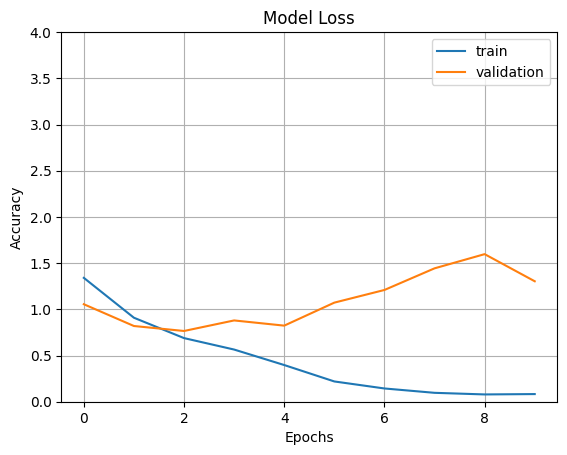

In [19]:
#Baseline model performance graph
Model_Accuracy = plt.gcf()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.axis(ymin=0,ymax=4)
plt.grid()
plt.title('Model Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

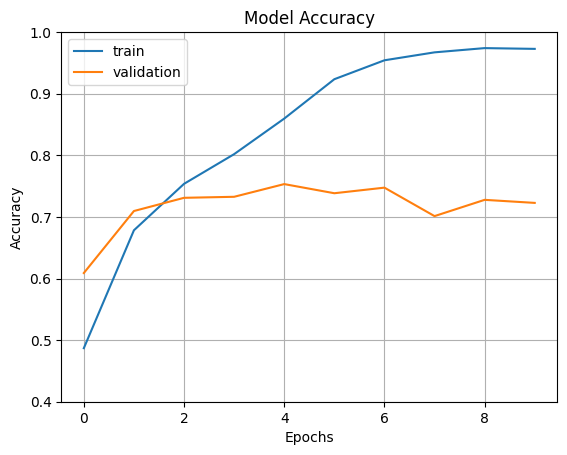

In [20]:
#Baseline model performance graph
Model_Accuracy = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [21]:
model.evaluate(test_ds)

39/39 [==============================] - 8s 171ms/step - loss: 405.6438 - accuracy: 0.6176


[405.6438293457031, 0.6176470518112183]

In [22]:
#Saving baseline model as h5 format
model.save('/content/drive/MyDrive/models/baseline_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## **Predicting Image**


1/1 [==============================] - 0s 136ms/step
Predicted item Class: 0


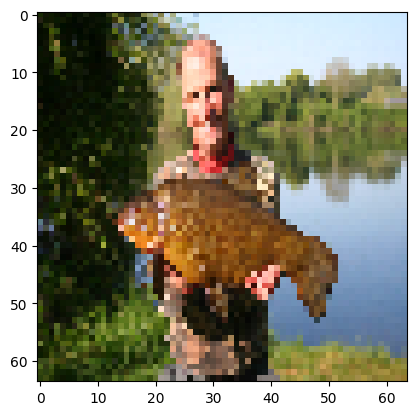

In [23]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import cv2

# Load the model
model = load_model('/content/drive/MyDrive/models/baseline_model.h5')

# Load image and turn value to array

img = load_img('/content/drive/MyDrive/t.jpeg', target_size=(64, 64))

x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x /= 255.0
preds = model.predict(x)
print('Predicted item Class:', np.argmax(preds[0]))
# Print the predicted class

plt.imshow(img)
plt.show()

### **Fine Tuning the Base line Model - Model 1 (Using Data Augmentation)**

In [3]:
#Data Augmentation
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator


In [24]:
#Building a Fine Tuned Model
#generators
batch_size=32

train_datagen= ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest',
)
val_datagen= ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.15,
    horizontal_flip=True,
    width_shift_range=0.14,
    height_shift_range=0.11,
    fill_mode='nearest',
)
test_datagen=ImageDataGenerator(rescale=1./255)

In [25]:
#Generate Augmented Data
train_generator=train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Imagenette/train',
    target_size=(64,64),
    batch_size=batch_size,
    class_mode='sparse'
)
validation_generator = val_datagen.flow_from_directory(
'/content/drive/MyDrive/Imagenette/val',
 target_size=(64, 64),
 batch_size=batch_size,
 class_mode='sparse')

test_generator=test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Imagenette/test',
    target_size=(64, 64),
    batch_size=20,
    class_mode='sparse'
)

Found 5664 images belonging to 6 classes.
Found 1212 images belonging to 6 classes.
Found 1224 images belonging to 6 classes.


In [26]:
#Same CNN Structure

model = Sequential()

#Add Convolution Layers -32 filters
model.add(Conv2D(32, kernel_size=(3,3),kernel_initializer='glorot_uniform',dilation_rate=(1,1), strides=(1,1),activation='relu', input_shape=(64,64,3)))
model.add(Conv2D(32, kernel_size=(3,3),kernel_initializer='glorot_uniform',dilation_rate=(1,1), strides=(1,1),activation='relu'))
#Add pooling
model.add(MaxPooling2D(pool_size=(2,2)))

#Add Convolution Layers -64 filters
model.add(Conv2D(64, kernel_size=(3,3), dilation_rate=(1,1),kernel_initializer='glorot_uniform',strides=(1,1),activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), dilation_rate=(1,1),kernel_initializer='glorot_uniform',strides=(1,1),activation='relu'))
#Add Pooling
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatten Layers into 1D
model.add(Flatten())

#Fully Connected Nueral Network
model.add(Dense(512, activation='relu'))
model.add(Dense(6, activation='softmax'))

#Model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                 

In [27]:
#compile fine tuned model
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [28]:
history1=model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=None,
)

<ipython-input-28-bd016952c349>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history1=model.fit_generator(


Epoch 1/100
100/100 [==============================] - 91s 835ms/step - loss: 1.7885 - accuracy: 0.2425 - val_loss: 1.6039 - val_accuracy: 0.3300
Epoch 2/100
100/100 [==============================] - 74s 737ms/step - loss: 1.5781 - accuracy: 0.3653 - val_loss: 1.4160 - val_accuracy: 0.4620
Epoch 3/100
100/100 [==============================] - 72s 718ms/step - loss: 1.4181 - accuracy: 0.4456 - val_loss: 1.4779 - val_accuracy: 0.4224
Epoch 4/100
100/100 [==============================] - 74s 743ms/step - loss: 1.3479 - accuracy: 0.4863 - val_loss: 1.2443 - val_accuracy: 0.5198
Epoch 5/100
100/100 [==============================] - 73s 730ms/step - loss: 1.2681 - accuracy: 0.5419 - val_loss: 1.0906 - val_accuracy: 0.5982
Epoch 6/100
100/100 [==============================] - 72s 719ms/step - loss: 1.2337 - accuracy: 0.5522 - val_loss: 1.1426 - val_accuracy: 0.5809
Epoch 7/100
100/100 [==============================] - 73s 724ms/step - loss: 1.1565 - accuracy: 0.5834 - val_loss: 0.9924 -

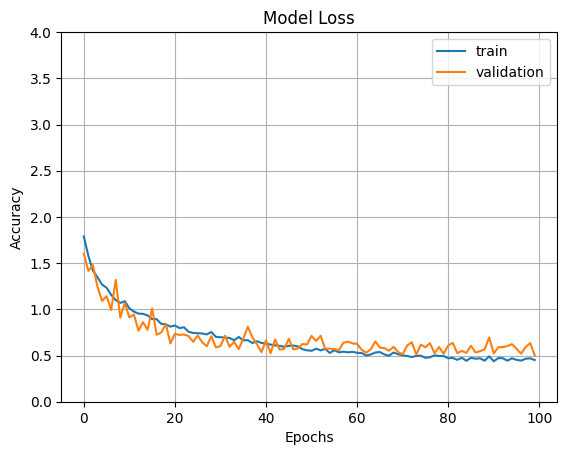

In [29]:
#Baseline model performance graph
Model_Accuracy = plt.gcf()
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.axis(ymin=0,ymax=4)
plt.grid()
plt.title('Model Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

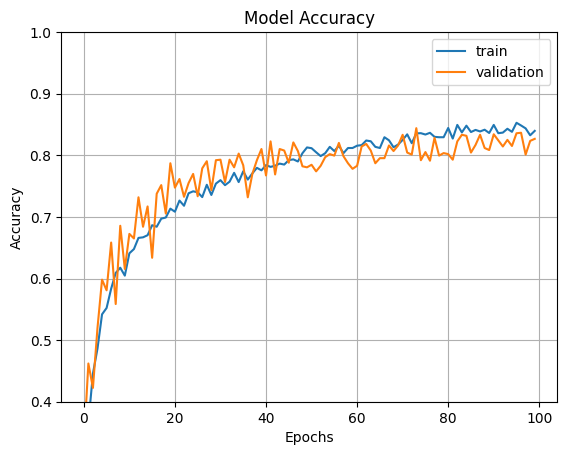

In [30]:
#Baseline model performance graph
Model_Accuracy = plt.gcf()
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [34]:
test_generator = test_datagen.flow_from_directory(
 '/content/drive/MyDrive/Imagenette/test',
 target_size=(64, 64),
 batch_size=16,
 class_mode='sparse')
results = model.evaluate_generator(
 test_generator,
 steps=10)
print('Final test accuracy:', (results[1]*100.0))

Found 1224 images belonging to 6 classes.


<ipython-input-34-a3c89080202b>:6: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  results = model.evaluate_generator(


Final test accuracy: 76.2499988079071


In [32]:
#Saving First Fine Tuned model in h5 format
model.save('/content/drive/MyDrive/models/First_Fine_Tuned_model.h5')

1/1 [==============================] - 0s 275ms/step
Predicted item Class: 4


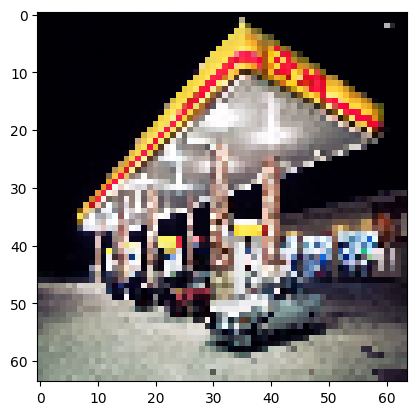

In [62]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import numpy as np

# Load the model
model = load_model('/content/drive/MyDrive/models/First_Fine_Tuned_model.h5')

# Load image and turn value to array

img = load_img('/content/drive/MyDrive/gs.jpg', target_size=(64, 64)) #Gas pump image

x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x /= 255.0
preds = model.predict(x)
print('Predicted item Class:', np.argmax(preds[0]))
# Print the predicted class

plt.imshow(img)
plt.show()